**Import all necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

**Load Train data and Production data**

In [4]:
df_train = pd.read_csv(r"C:\Users\M1078280\OneDrive - Mindtree Limited\Desktop\Mindtree_Data_Science_Case_Study\Mindtree_Data_Science_Case_Study\churn_training_data.csv")
df_production = pd.read_csv(r"C:\Users\M1078280\OneDrive - Mindtree Limited\Desktop\Mindtree_Data_Science_Case_Study\Mindtree_Data_Science_Case_Study\churn_production_data.csv")

**View and Analyze the data to perform required Preprocessing steps**

In [5]:
# Detecting duplicates
df_train.duplicated().sum()

0

In [6]:
df_train.shape

(6499, 21)

In [7]:
df_train.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_train.dtypes

CustomerID            object
Gender                object
Senior Citizen         int64
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn                 object
dtype: object

In [9]:
df_production.shape

(544, 20)

In [10]:
df_production.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,2676-ISHSF,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,20.30
1,9236-NDUCW,Female,0,No,No,21,No,No phone service,DSL,Yes,No,No,Yes,No,No,Two year,No,Mailed check,35.10,770.40
2,4753-PADAS,Female,0,Yes,No,67,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),105.70,6816.95
3,6103-QCKFX,Female,0,Yes,Yes,44,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),56.25,2419.55
4,7781-EWARA,Male,0,Yes,Yes,70,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.35,4138.70


In [11]:
df_production.columns

Index(['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges'],
      dtype='object')

**Detecting and handling Null values from train data and production data**

In [12]:
null_values = df_train.isna().sum()
for i in null_values.index:
    if null_values[i]>0:
        print(i,null_values[i])

Total Charges 9


In [13]:
null_values = df_production.isna().sum()
for i in null_values.index:
    if null_values[i]>0:
        print(i,null_values[i])

Total Charges 2


In [14]:
#dropping churn column as it is dependent variable and will not be used in data preprocessing
#df_train2 = df_train.drop('Churn',axis=1)
#df_train2.dtypes

In [15]:
#df_train_test = df_train2.append(df_production)

In [16]:
df_train.shape

(6499, 21)

In [17]:
df_train['Total Charges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: Total Charges, dtype: float64

In [18]:
df_train.describe()

,Senior Citizen,Tenure,Monthly Charges,Total Charges
count,6499.000000,6499.000000,6499.000000,6490.000000
mean,0.162487,32.369134,64.733344,2282.935177
std,0.368925,24.584693,30.136193,2270.034922
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.400000,399.300000
50%,0.000000,29.000000,70.350000,1397.100000
75%,0.000000,55.000000,89.850000,3786.612500
max,1.000000,72.000000,118.750000,8684.800000


* From the above analysis for 'Total charges' feature, the missing values are very less.
* Imputing the missing values in 'Total charges' feature with median value.

In [19]:
df_train['Total Charges'] = df_train['Total Charges'].fillna(df_train['Total Charges'].median())
df_train.isna().sum()

CustomerID           0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [20]:
# Dropping CustomerID column from data frame as it adds very less importance for prediction
df_train2 = df_train.drop('CustomerID',axis=1)
df_train2.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
#Converting 'Churn' column values in data frame from Yes, No to 1,0 respectively
df_train2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_train2['Churn'].replace(to_replace='No', value=0, inplace=True)

#convert categorical values into numerical by creating dummies
df_dummies = pd.get_dummies(df_train2)
df_dummies.head()

,Senior Citizen,Tenure,Monthly Charges,Total Charges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [22]:
df_dummies['Senior Citizen'].unique()

array([0, 1], dtype=int64)

**Detecting and handling outliers in Tenure, Monthly Charges, Total Charges**

* From below analysis we can see that outliers are not present in data.

In [23]:
# For 'Tenure' variable
# Detecting Outliers/ spoting outliers
# Using IQR
q1 = df_dummies['Tenure'].quantile(0.25)
q3 = df_dummies['Tenure'].quantile(0.75)
IQR = q3-q1
min_Value = q1-1.5*IQR
max_Value = q3+1.5*IQR

outliers = []
for i in df_dummies['Tenure']:
    #print(i)
    if i< min_Value or i>max_Value:
        outliers.append(i)
print("Outliers:",outliers)


Outliers: []


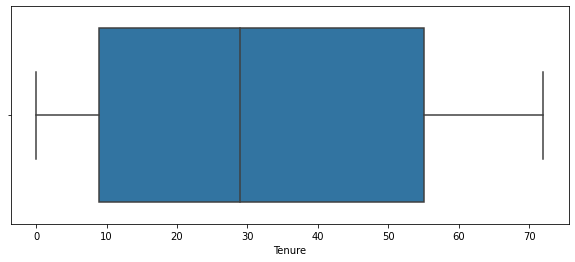

In [24]:
#Visualizing outliers using BOX plot for Tenure variable
plt.figure(figsize=(10,4))
sns.boxplot(df_dummies['Tenure'])
plt.show()

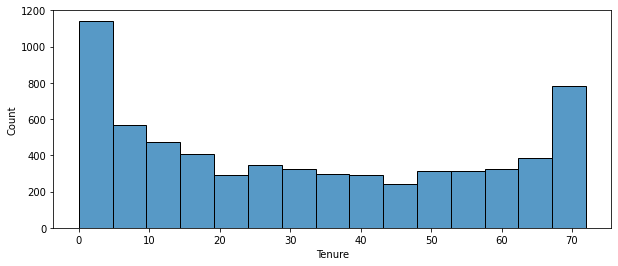

In [25]:
# ploting histogram to detect outliers
plt.figure(figsize=(10,4))
sns.histplot(df_dummies['Tenure'])
plt.show()

In [26]:
df_dummies['Tenure'].mean()

32.369133712878906

In [27]:
df_dummies['Tenure'].median()

29.0

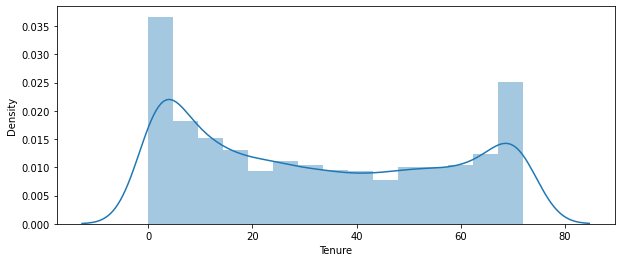

In [28]:
plt.figure(figsize=[10,4])
sns.distplot(df_dummies['Tenure'])
plt.show()

* From the above analysis we can say that the Tenure Variable in data doesn't have outliers

In [29]:
#Detecting outliers for 'Monthly charges' variable
#IQR

q1 = df_dummies['Monthly Charges'].quantile(0.25)
q3 = df_dummies['Monthly Charges'].quantile(0.75)
IQR = q3-q1
min_Value = q1-1.5*IQR
max_Value = q3+1.5*IQR
outliers = []
print("25% value of data:",q1,"\n 75% value of data:",q3,"\n","Min_Value:",min_Value,"\nMax_value:",max_Value)
for i in df_dummies['Monthly Charges']:
    if i<min_Value or i>max_Value:
        outliers.append(i)
print("Outliers",outliers)

25% value of data: 35.4 
 75% value of data: 89.85 
 Min_Value: -46.275 
Max_value: 171.52499999999998
Outliers []


In [30]:
print("Mean:",df_dummies['Monthly Charges'].mean(),"\nMedian:",df_dummies['Monthly Charges'].median())

Mean: 64.73334359132174 
Median: 70.35


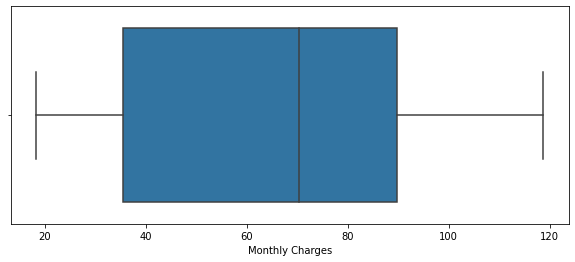

In [31]:
# detecting outliers using Visualization techniques
#Box plot
plt.figure(figsize=(10,4))
sns.boxplot(df_dummies['Monthly Charges'])
plt.show()

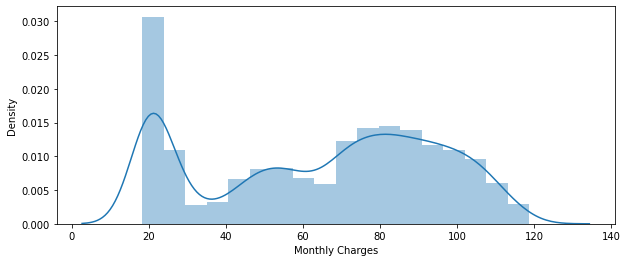

In [32]:
plt.figure(figsize=(10,4))
sns.distplot(df_dummies['Monthly Charges'])
plt.show()

*From the above analysis we can say the Monthly_charges variable doesn't have outliers

In [33]:
print("Mean:",df_dummies['Total Charges'].mean(),"\nMedian:",df_dummies['Total Charges'].median())

Mean: 2281.7084474534545 
Median: 1397.1


In [34]:
# IQR to detect outliers for 'Total charges' variable
q1 = df_dummies['Total Charges'].quantile(0.25)
q3 = df_dummies['Total Charges'].quantile(0.75)
IQR = q3-q1
min_Value = q1-1.5*IQR
max_Value = q3+1.5*IQR
outliers = []
for i in df_dummies['Total Charges']:
    if i<min_Value or i>max_Value:
        outliers.append(i)
        
print(outliers)

[]


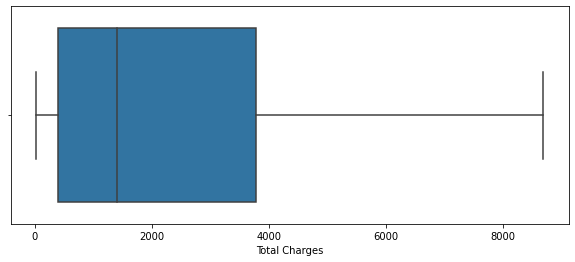

In [35]:
# Using box plot to detect outliers
plt.figure(figsize=(10,4))
sns.boxplot(df_dummies['Total Charges'])
plt.show()

<AxesSubplot:xlabel='Total Charges', ylabel='Density'>

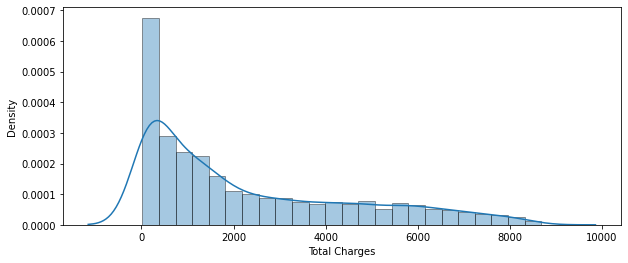

In [36]:
# Distribution plot
plt.figure(figsize=(10,4))
sns.distplot(df_dummies['Total Charges'],hist_kws={'edgecolor':'black'})

*From the above analysis we don't see any outliers present for Total Charges variable as well

**EDA**

<AxesSubplot:>

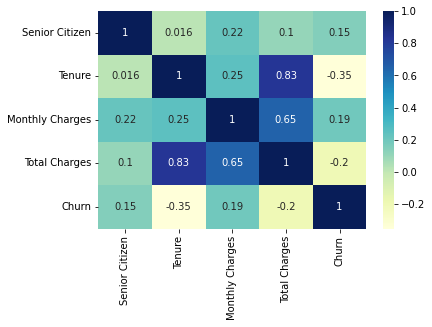

In [37]:
# Correlation between numerical values using HeatMap
corr = sns.heatmap(df_train2.corr(),annot=True,cmap="YlGnBu")
corr

* From the above correlation we can say that as the Monthly charges increase the Churn rate is more.
* When the Tenure is less the churn rate is more.
* Total Charges and Tenure are negatively correlated.
* From the above correlation heatmap we can see that- Monthly charges and Senior citizen are positively correlated.

<AxesSubplot:xlabel='Churn', ylabel='count'>

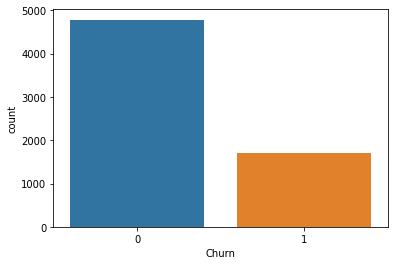

In [38]:
sns.countplot(data = df_train2, x= 'Churn')

* From above bar plot we can see the customer churn rate is less when compared to the customers staying with the company

<AxesSubplot:xlabel='Gender', ylabel='count'>

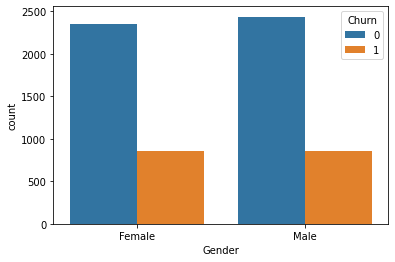

In [39]:
sns.countplot(data = df_train2, x= 'Gender',hue="Churn")

* From above plot we can see that there isn't much variation in data w.r.t Gender.
* Gender doesn't have much effect on churn rate

<AxesSubplot:xlabel='Senior Citizen', ylabel='count'>

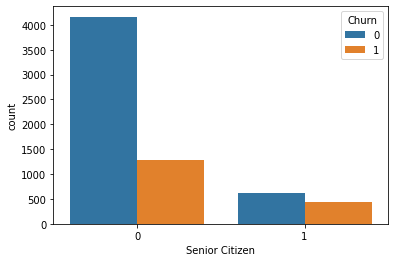

In [40]:
sns.countplot(data=df_train2,x='Senior Citizen',hue='Churn')

* From above graph we can see in our data. percentage of customers who are senior citizens very less compared to youth subscripton.

<AxesSubplot:title={'center':'With Dependents'}, xlabel='Dependents', ylabel='count'>

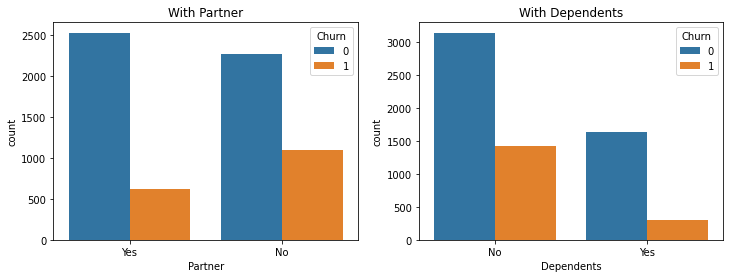

In [41]:
# with partners/ with dependents
figure, axis = plt.subplots(1,2,figsize=(12,4))
axis[0].set_title('With Partner')
axis[1].set_title('With Dependents')
sns.countplot(data=df_train2,x='Partner',hue='Churn',ax=axis[0],)
sns.countplot(data=df_train2,x='Dependents',hue='Churn',ax=axis[1])

* From the above analysis, 
The churn rate is more in customers who has partners compared to customers who have dependents

Text(0.5, 1.0, 'customers by tenure')

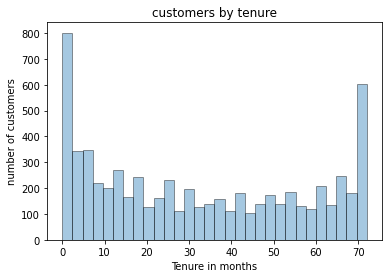

In [42]:
plot = sns.distplot(df_train2['Tenure'],hist = True ,bins=30, hist_kws={'edgecolor':'black'},kde=False)
plot.set_xlabel('Tenure in months')
plot.set_ylabel('number of customers')
plot.set_title('customers by tenure')

* Customers with less tenure tend to Churn more than long term customers.
* Good to know that more number of customers stay in long tenure.

<AxesSubplot:xlabel='Contract', ylabel='count'>

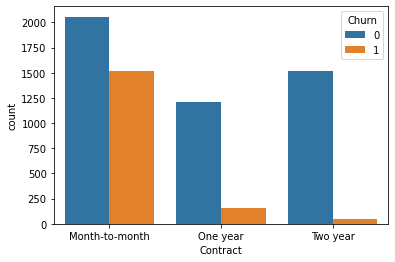

In [43]:
# Churn based on Contract
sns.countplot(data=df_train2,x='Contract',hue='Churn')

* From above plot we can see, the churn rate is more in Month-to-month
* Churn rate is less in Two year contract

<AxesSubplot:xlabel='Monthly Charges', ylabel='Total Charges'>

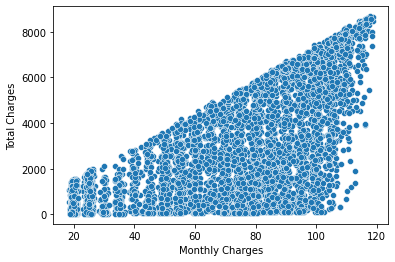

In [44]:
sns.scatterplot(x='Monthly Charges', y='Total Charges',data=df_train2)

* From above scatter plot we can see that Total charges increase as Monthly charges increase

* From the above EDA performed we can summarize that 
* The customer churn rate is less compared to customers staying with the company.
* The Churn rate is high for monthly contract compared to Two year contract.
* The more number of customers are youth.
* The customers who are senior citizens tend to churn more.
* The customer churn is more in less than 3 months tenure subscription, Good to know that more number of customers stay in long tenure.
* Total charges and Tenure are negatively correlated with each other which says when the Total charge increases the Tenure of the customer to stay with the company decreases.
* The churn rate is more in customers who has partners compared to customers who have dependents.

**Applying Predictive Model to data**

In [45]:
# Taking x,y values from data frame
y = df_dummies['Churn'].values
X = df_dummies.drop('Churn',axis=1)

# Scaling using MinMaxScalar
scaled = MinMaxScaler(feature_range=(0,1))
X_scaled = scaled.fit_transform(X)

In [46]:
# Splitting train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=30)

**Logistic Regression**

In [47]:
model = LogisticRegression()
Logistic_result = model.fit(X_train,y_train)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [49]:
from sklearn import metrics

In [50]:
y_pred = model.predict(X_test)

# Accuracy of predicted test result  based on Logistic Regression
accuracy_score(y_test,y_pred)

0.7917948717948718

In [51]:
y_pred_AUC = model.predict_proba(X_test)
metrics.roc_auc_score(y_test,y_pred_AUC[:,1])

0.8428308028771772

In [52]:
# Using kfold cross validation 
score = []
from sklearn.model_selection import cross_val_score,KFold

kfold = KFold(n_splits=3)
crossValid = cross_val_score(model,X_scaled,y,cv=kfold)
max_accuracy = max(crossValid)
score.append(max_accuracy)
print("Highest accuracy score is:",sorted(score,reverse=True))

Highest accuracy score is: [0.8057221965851408]


* Accuracy score obtained for Logistic regression is 79.2%
* ROC AUC score for Logistic Regression is 85.4%
* Cross Validation score for Logistic Regression using Kfold is 80.6%

In [53]:
# Finding important features from data using Logistic Regression model
important = model.coef_
(X.columns.values,important)
print(len(X.columns.values))
type(important)
featureNames = X.columns.values

45


In [54]:
#Remove the nested array/List and convert into flat list to map with each feature, to know important features
output=[]
def nestedList(l):
    for i in l:
        if type(i) == type(l):
            nestedList(i)
        else:
            output.append(i)
nestedList(important)
print("output after removed nested lists",output)
print(len(output))

output after removed nested lists [0.24199018836583036, -3.063008653964895, -0.14219355354724159, 1.0344485286810352, -0.0035679361535018634, 0.002255142964998963, -0.0058792803242610605, 0.004566487135845164, 0.05519058929568987, -0.056503382484103915, 0.06858708823662404, -0.06989988142506862, -0.16312598563873895, 0.06858708823662343, 0.09322610421373934, -0.3755960300191058, 0.4865862412107918, -0.1123030043801589, 0.2708319995844082, -0.1123030043801936, -0.15984178839271468, 0.13854882175766972, -0.1123030043801589, -0.027558610565917047, 0.035572264324081976, -0.1123030043801936, 0.07541794686765765, 0.23548917684820417, -0.1123030043801589, -0.12449896565646348, -0.06602124564721304, -0.1123030043801936, 0.1770114568389795, -0.11557860149841737, -0.1123030043801589, 0.22656881269018125, 0.6584319387154484, -0.0717046163579697, -0.5880401155459363, -0.16861108833585628, 0.16729829514744995, -0.05965653679776993, -0.17536474743654462, 0.2591908598925968, -0.02548236884667723]
45


In [55]:
# Mapping features with its importance value using dictonary
Features_important={}
for i in range(len(output)):
    Features_important[featureNames[i]]=output[i]
print(Features_important)

{'Senior Citizen': 0.24199018836583036, 'Tenure': -3.063008653964895, 'Monthly Charges': -0.14219355354724159, 'Total Charges': 1.0344485286810352, 'Gender_Female': -0.0035679361535018634, 'Gender_Male': 0.002255142964998963, 'Partner_No': -0.0058792803242610605, 'Partner_Yes': 0.004566487135845164, 'Dependents_No': 0.05519058929568987, 'Dependents_Yes': -0.056503382484103915, 'Phone Service_No': 0.06858708823662404, 'Phone Service_Yes': -0.06989988142506862, 'Multiple Lines_No': -0.16312598563873895, 'Multiple Lines_No phone service': 0.06858708823662343, 'Multiple Lines_Yes': 0.09322610421373934, 'Internet Service_DSL': -0.3755960300191058, 'Internet Service_Fiber optic': 0.4865862412107918, 'Internet Service_No': -0.1123030043801589, 'Online Security_No': 0.2708319995844082, 'Online Security_No internet service': -0.1123030043801936, 'Online Security_Yes': -0.15984178839271468, 'Online Backup_No': 0.13854882175766972, 'Online Backup_No internet service': -0.1123030043801589, 'Online

In [56]:
#Sorting features w.r.t. the importance
Important_features_LR = dict(sorted(Features_important.items(),key= lambda x:x[1],reverse=True))
Important_features_LR

{'Total Charges': 1.0344485286810352,
 'Contract_Month-to-month': 0.6584319387154484,
 'Internet Service_Fiber optic': 0.4865862412107918,
 'Online Security_No': 0.2708319995844082,
 'Payment Method_Electronic check': 0.2591908598925968,
 'Senior Citizen': 0.24199018836583036,
 'Tech Support_No': 0.23548917684820417,
 'Streaming Movies_Yes': 0.22656881269018125,
 'Streaming TV_Yes': 0.1770114568389795,
 'Paperless Billing_Yes': 0.16729829514744995,
 'Online Backup_No': 0.13854882175766972,
 'Multiple Lines_Yes': 0.09322610421373934,
 'Device Protection_Yes': 0.07541794686765765,
 'Phone Service_No': 0.06858708823662404,
 'Multiple Lines_No phone service': 0.06858708823662343,
 'Dependents_No': 0.05519058929568987,
 'Device Protection_No': 0.035572264324081976,
 'Partner_Yes': 0.004566487135845164,
 'Gender_Male': 0.002255142964998963,
 'Gender_Female': -0.0035679361535018634,
 'Partner_No': -0.0058792803242610605,
 'Payment Method_Mailed check': -0.02548236884667723,
 'Online Backup_Ye

In [57]:
# checking weather data is balanced or unbalanced
df_train['Churn'].value_counts()

No     4784
Yes    1715
Name: Churn, dtype: int64

**Random Forest Classifier**

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=35)
model_RF=RandomForestClassifier(n_estimators=300,random_state=36)
model_RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=36)

In [59]:
y_pred = model_RF.predict(X_test)
#accuracy score for Random Forest
accuracy_score(y_test,y_pred)

0.7870769230769231

In [60]:
y_pred_AUC = model_RF.predict_proba(X_test)
metrics.roc_auc_score(y_test,y_pred_AUC[:,1])

0.818367751716337

In [61]:
# Using kfold cross validation 
score = []

kfold = KFold(n_splits=3)
crossValid = cross_val_score(model_RF,X_scaled,y,cv=kfold)
max_accuracy = max(crossValid)
score.append(max_accuracy)
print("Highest accuracy score is:",score)

Highest accuracy score is: [0.792339640055376]


* Accuracy score obtained for Random Forest Classifier is 78.7%
* ROC AUC score for Random Forest Classifier is 97.1%
* Cross Validation score for Random Forest Classifier is 79.2%

In [62]:
# Important features
important = model_RF.feature_importances_
# Mapping features with its importance value using dictonary
Features_important={}
for i in range(len(important)):
    Features_important[featureNames[i]]=important[i]
#Sorting features w.r.t. the importance
Important_features_RF = dict(sorted(Features_important.items(),key= lambda x:x[1],reverse=True))
Important_features_RF

{'Total Charges': 0.15958028103159222,
 'Tenure': 0.14588048526106276,
 'Monthly Charges': 0.13574114785274471,
 'Contract_Month-to-month': 0.04559888779267046,
 'Online Security_No': 0.03131847610305723,
 'Payment Method_Electronic check': 0.03082926081210701,
 'Tech Support_No': 0.02808859180382732,
 'Internet Service_Fiber optic': 0.02434520108435181,
 'Senior Citizen': 0.019954741553763294,
 'Online Backup_No': 0.019306575301444587,
 'Gender_Male': 0.018297837420288874,
 'Gender_Female': 0.017959893083198245,
 'Contract_Two year': 0.017894350009009713,
 'Paperless Billing_Yes': 0.01638701508671278,
 'Paperless Billing_No': 0.015227196569134066,
 'Partner_Yes': 0.014308615264316251,
 'Partner_No': 0.01412942827108415,
 'Device Protection_No': 0.013648451476758177,
 'Multiple Lines_No': 0.01360187757070807,
 'Multiple Lines_Yes': 0.013183342264028307,
 'Payment Method_Credit card (automatic)': 0.012661773835945815,
 'Dependents_Yes': 0.012470705302551833,
 'Streaming Movies_Yes': 0.0

**XGBoost**

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=27)

In [64]:
# Applying XG Boost Classifier 
model_XGB = XGBClassifier()
model_XGB.fit(X_train,y_train)

[11:01:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
y_pred = model_XGB.predict(X_test)
accuracy_score(y_test,y_pred)

0.7938461538461539

In [66]:
y_pred_AUC = model_XGB.predict_proba(X_test)
metrics.roc_auc_score(y_test,y_pred_AUC[:,1])

0.8292435015807796

In [67]:
# Using kfold cross validation 
score = []

kfold = KFold(n_splits=3)
crossValid = cross_val_score(model_XGB,X_scaled,y,cv=kfold)
max_accuracy = max(crossValid)
score.append(max_accuracy)
print("Highest accuracy score is:",score)

[11:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:01:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Highest accuracy score is: [0.7931671283471837]


* Accuracy score obtained for XGBoost classifier is 79.4%
* ROC AUC score obtained for XGBoost classifier is 96.1%
* Cross Validation Score for XGBoost classifier is 79.3%

In [68]:
# Important features
important = model_XGB.feature_importances_
# Mapping features with its importance value using dictonary
Features_important={}
for i in range(len(important)):
    Features_important[featureNames[i]]=important[i]
#Sorting features w.r.t. the importance
Important_features_XGB = dict(sorted(Features_important.items(),key= lambda x:x[1],reverse=True))
Important_features_XGB

{'Contract_Month-to-month': 0.37392467,
 'Internet Service_Fiber optic': 0.19772035,
 'Contract_Two year': 0.035097647,
 'Online Security_No': 0.031971365,
 'Internet Service_DSL': 0.030965647,
 'Tech Support_No': 0.025284503,
 'Streaming TV_Yes': 0.01759143,
 'Phone Service_No': 0.016664423,
 'Payment Method_Electronic check': 0.016655099,
 'Paperless Billing_No': 0.016397642,
 'Contract_One year': 0.014879522,
 'Streaming Movies_No': 0.0145154875,
 'Tenure': 0.014423264,
 'Online Backup_No': 0.013706279,
 'Streaming Movies_Yes': 0.01358416,
 'Total Charges': 0.012934094,
 'Online Backup_Yes': 0.012670355,
 'Multiple Lines_No': 0.01266793,
 'Monthly Charges': 0.011185283,
 'Senior Citizen': 0.011115952,
 'Streaming TV_No': 0.01092533,
 'Multiple Lines_Yes': 0.010905686,
 'Dependents_No': 0.009860396,
 'Gender_Female': 0.009393529,
 'Partner_No': 0.00912628,
 'Payment Method_Bank transfer (automatic)': 0.008937378,
 'Device Protection_No': 0.008501952,
 'Payment Method_Credit card (aut

**Support vector Machine(SVM)**

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=72)

In [70]:
# Applying Support Vector machine Algorithm with kernal as linear
model_SVC = SVC(kernel='linear')
model_SVC.fit(X_train,y_train)

SVC(kernel='linear')

In [71]:
y_pred = model_SVC.predict(X_test)
accuracy_score(y_test,y_pred)

0.7932307692307692

In [72]:
# Using kfold cross validation 
score = []

kfold = KFold(n_splits=3)
crossValid = cross_val_score(model_SVC,X_scaled,y,cv=kfold)
max_accuracy = max(crossValid)
score.append(max_accuracy)
print("Highest accuracy score is:",score)

Highest accuracy score is: [0.8071065989847716]


* Accuracy score obtained for SVC is 79.3%
* Cross validation score for SVC is 80.7%

In [73]:
# Confusion matrix for SVM model
confusion_matrix(y_test,y_pred)

array([[1060,  123],
       [ 213,  229]], dtype=int64)

In [74]:
#Classification report for SVM
from sklearn.metrics import classification_report
ClassificationReport=classification_report(y_test,y_pred)
print(ClassificationReport)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1183
           1       0.65      0.52      0.58       442

    accuracy                           0.79      1625
   macro avg       0.74      0.71      0.72      1625
weighted avg       0.78      0.79      0.79      1625



**Decision Tree**

In [75]:
model_DT = DecisionTreeClassifier(random_state=38)
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=38)

In [76]:
y_pred = model_DT.predict(X_test)
accuracy_score(y_test,y_pred)

0.7267692307692307

In [77]:
y_pred_AUC = model_DT.predict_proba(X_test)
metrics.roc_auc_score(y_test,y_pred_AUC[:,1])

0.660704245284823

In [78]:
# Using kfold cross validation 
score = []

kfold = KFold(n_splits=3)
crossValid = cross_val_score(model_DT,X_scaled,y,cv=kfold)
max_accuracy = max(crossValid)
score.append(max_accuracy)
print("Highest accuracy score is:",score)

Highest accuracy score is: [0.7328103368712505]


* Accuracy score obtained for Decision tree is 72.7%
* ROC AUC score obtained is 66%
* Cross validation score for Decision tree is 73.3%

* From the above accuracy using the models, we can see that the prediction accuracy is more for "Random Forest Classifer" 
with 97.3% accuracy using ROC AUC score.
* The next highest accuracy score using ROC AUC score is more for "XGBoost Classifier" with 96.1%

**Working on Production data**

In [79]:
df_production.shape

(544, 20)

In [80]:
df_production.isna().sum()

CustomerID           0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        2
dtype: int64

In [81]:
#dropping the null value rows
df_production.dropna(inplace=True)
df_production.shape

(542, 20)

In [82]:
df_production2 = df_production.drop('CustomerID',axis=1)
#convert categorical values into numerical by creating dummies
df_dummies_prod = pd.get_dummies(df_production2)
df_dummies_prod.head()

,Senior Citizen,Tenure,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,1,20.30,20.30,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,0,21,35.10,770.40,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1
2,0,67,105.70,6816.95,1,0,0,1,1,0,...,1,0,1,0,0,1,1,0,0,0
3,0,44,56.25,2419.55,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,70,60.35,4138.70,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0


In [83]:
# Scale using MinMaxScalar
#Scaling using MinMaxScalar
scaled = MinMaxScaler(feature_range=(0,1))
X_prod_scaled = scaled.fit_transform(df_dummies_prod)

In [84]:
y_pred = model_XGB.predict(X_prod_scaled)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [85]:
import pickle

In [86]:
#saving model in storage
pickle.dump(model_RF,open('model_RF.pkl','wb'))

In [87]:
# loading model to compare predicted values
model_RF = pickle.load(open('model_RF.pkl','rb'))
print(model_RF.predict(X_test)[:30])

[0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
